In [13]:
import pandas as pd
import os

# Define the folder path where your datasets are located
data_folder = r'C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset'

# Define the output path and filename for the merged dataset
output_file_path = os.path.join(data_folder, 'merged_dataset_with_year.csv')

# Define all expected column names, based on your latest list
# Ensure this list covers all columns you wish to retain
expected_columns = [
    'AUTHORISATION ID / PERMIT ID',
    'ACTIVITY DESCRIPTION',
    'OPERATOR NAME',
    'SITE ADDRESS',
    'SITE POSTCODE',
    'EASTING',
    'NORTHING',
    'EA AREA NAME',
    'ROUTE NAME',
    'SUBSTANCE NAME',
    'REPORTING THRESHOLD (kg)',
    'QUANTITY RELEASED (kg)',
    'REGULATED INDUSTRY SECTOR',
    'REGULATED INDUSTRY SUB SECTOR',
    'PNEC (??g/L)', # Note the special characters '??' in this column name
    'Latitude',
    'Longitude',
    'REGION',
    'COUNTY',
    'EA AREA NAME LABEL',
    'ROUTE NAME LABEL'
]

# Create an empty list to store each DataFrame
all_dfs = []

# Loop through years from 2016 to 2023
for year_suffix in range(16, 24):
    year = 2000 + year_suffix
    file_name = f'd{year_suffix}_v4.csv'
    file_path = os.path.join(data_folder, file_name)

    try:
        # Attempt to read the CSV file
        # If special characters in 'PNEC (??g/L)' cause encoding issues, you might need to specify encoding.
        # Example: df = pd.read_csv(file_path, encoding='latin1')
        df = pd.read_csv(file_path)

        # --- Core column name standardization steps ---
        # 1. Strip leading/trailing whitespace from column names
        df.columns = df.columns.str.strip()
        # 2. Convert column names to uppercase to ensure case consistency
        df.columns = df.columns.str.upper()

        # Standardize the expected column names as well for matching
        standardized_expected_columns = [col.strip().upper() for col in expected_columns]

        # Check for and add any missing columns to ensure consistent structure across all DataFrames
        for col in standardized_expected_columns:
            if col not in df.columns:
                df[col] = pd.NA # Or None, depending on your preferred empty value type

        # Reorder and select only the columns we care about, ensuring identical column order and names
        df = df[standardized_expected_columns]

        # Add the 'Year' column
        df['Year'] = year
        all_dfs.append(df)
        print(f"Successfully loaded and processed file: {file_name}")

    except FileNotFoundError:
        print(f"File not found: {file_name}. Please check if the file exists and the path is correct.")
    except Exception as e:
        print(f"An error occurred while loading file {file_name}: {e}")

# Concatenate all DataFrames into a single one
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    print("\nAll datasets have been successfully merged!")
    print(f"The merged dataset contains {len(merged_df)} rows and {len(merged_df.columns)} columns.")

    # Save the merged dataset to the specified path
    merged_df.to_csv(output_file_path, index=False)
    print(f"The merged dataset has been saved to: {output_file_path}")
else:
    print("\nNo datasets were loaded successfully. Please check your files.")

Successfully loaded and processed file: d16_v4.csv
Successfully loaded and processed file: d17_v4.csv
Successfully loaded and processed file: d18_v4.csv
Successfully loaded and processed file: d19_v4.csv
Successfully loaded and processed file: d20_v4.csv
Successfully loaded and processed file: d21_v4.csv
Successfully loaded and processed file: d22_v4.csv
Successfully loaded and processed file: d23_v4.csv

All datasets have been successfully merged!
The merged dataset contains 9678 rows and 22 columns.
The merged dataset has been saved to: C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the chart style
sns.set(style="whitegrid")

# Path
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"

# Read data
df = pd.read_csv(file_path)

# Standardized pollutant names
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()


In [26]:
# Define PNEC value dictionary (unit: mg/L)
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Add PNEC column
df['PNEC (mg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)

# Recalculate Toxic Pressure
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (mg/L)']

# Check if it succeeded
print(df[['SUBSTANCE NAME', 'QUANTITY RELEASED (KG)', 'PNEC (mg/L)', 'Toxic Pressure']].head())


  SUBSTANCE NAME  QUANTITY RELEASED (KG)  PNEC (mg/L)  Toxic Pressure
0   Fluoranthene                    0.13     0.000762      170.603675
1   Fluoranthene                    0.22     0.000762      288.713911
2   Fluoranthene                    0.29     0.000762      380.577428
3   Fluoranthene                    0.52     0.000762      682.414698
4   Fluoranthene                    0.53     0.000762      695.538058


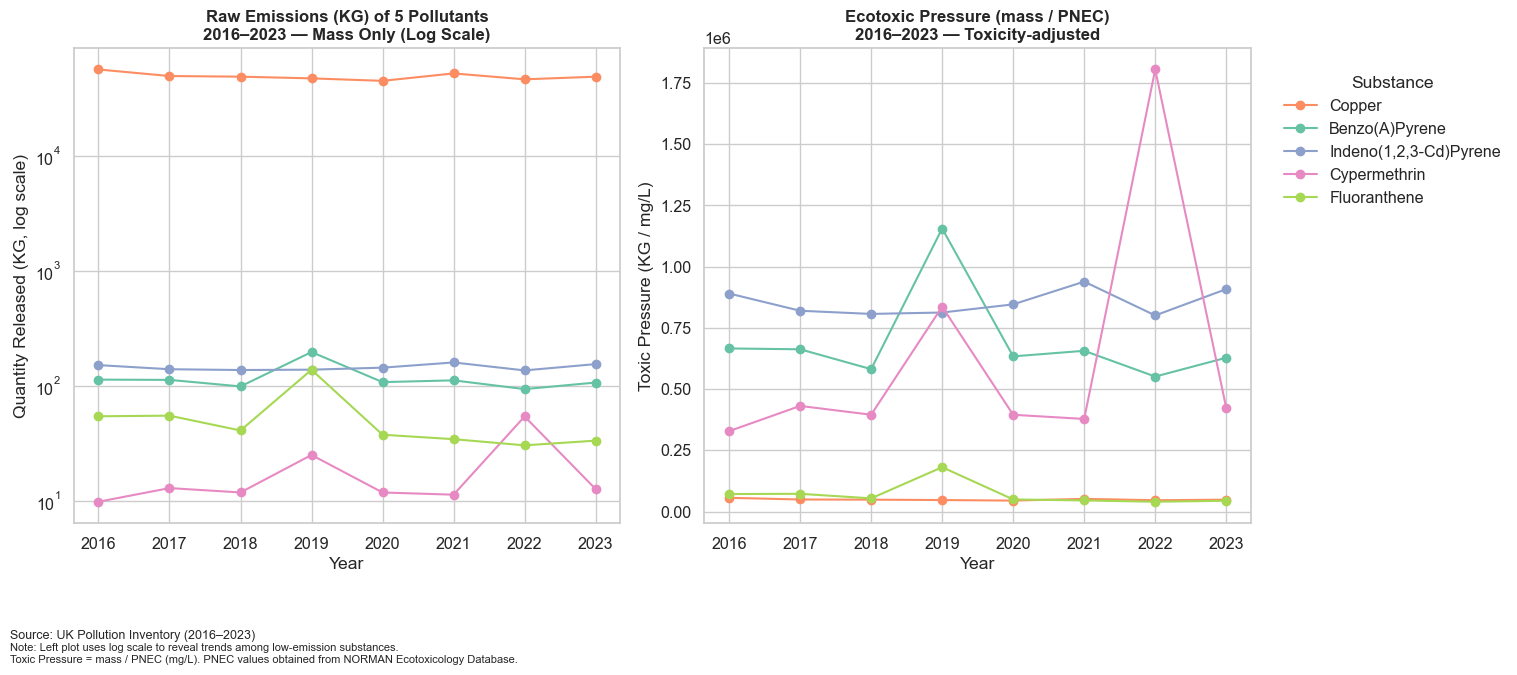

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.05)

# Read data
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate Toxic Pressure
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (mg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (mg/L)']

# Unified color scheme
substance_colors = {
    "Copper": "#FC8D62",
    "Benzo(A)Pyrene": "#66C2A5",
    "Indeno(1,2,3-Cd)Pyrene": "#8DA0CB",
    "Cypermethrin": "#E78AC3",
    "Fluoranthene": "#A6D854"
}

# Aggregate data
df_mass = df.groupby(['Year', 'SUBSTANCE NAME'])['QUANTITY RELEASED (KG)'].sum().reset_index()
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['Toxic Pressure'].sum().reset_index()

# Create an image
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Figure 1: Raw emissions (logarithmic scale)
for substance in substance_colors:
    data = df_mass[df_mass['SUBSTANCE NAME'] == substance]
    axes[0].plot(data['Year'], data['QUANTITY RELEASED (KG)'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[0].set_yscale('log')
axes[0].set_title("Raw Emissions (KG) of 5 Pollutants\n2016–2023 — Mass Only (Log Scale)", fontsize=12, weight='bold')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Quantity Released (KG, log scale)")

# Figure 2: Toxic Pressure
for substance in substance_colors:
    data = df_tp[df_tp['SUBSTANCE NAME'] == substance]
    axes[1].plot(data['Year'], data['Toxic Pressure'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[1].set_title("Ecotoxic Pressure (mass / PNEC)\n2016–2023 — Toxicity-adjusted", fontsize=12, weight='bold')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Toxic Pressure (KG / mg/L)")

# ✅ Extract legend correctly, use only the legend on the right and place it outside the image
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Substance",
           loc='center left', bbox_to_anchor=(0.85, 0.75), frameon=False)

# Comments
fig.text(0.01, -0.08, "Source: UK Pollution Inventory (2016–2023)", fontsize=9, ha='left')
fig.text(0.01, -0.12,
         "Note: Left plot uses log scale to reveal trends among low-emission substances.\n"
         "Toxic Pressure = mass / PNEC (mg/L). PNEC values obtained from NORMAN Ecotoxicology Database.",
         fontsize=8, ha='left')

# Save the image
plt.tight_layout(rect=[0, 0, 0.85, 1])  # 留出右侧 legend 空间
plt.savefig(r"C:\Users\qp24297\Downloads\Slide4_5_Comparison_LegendFixed.png", dpi=300)
plt.show()


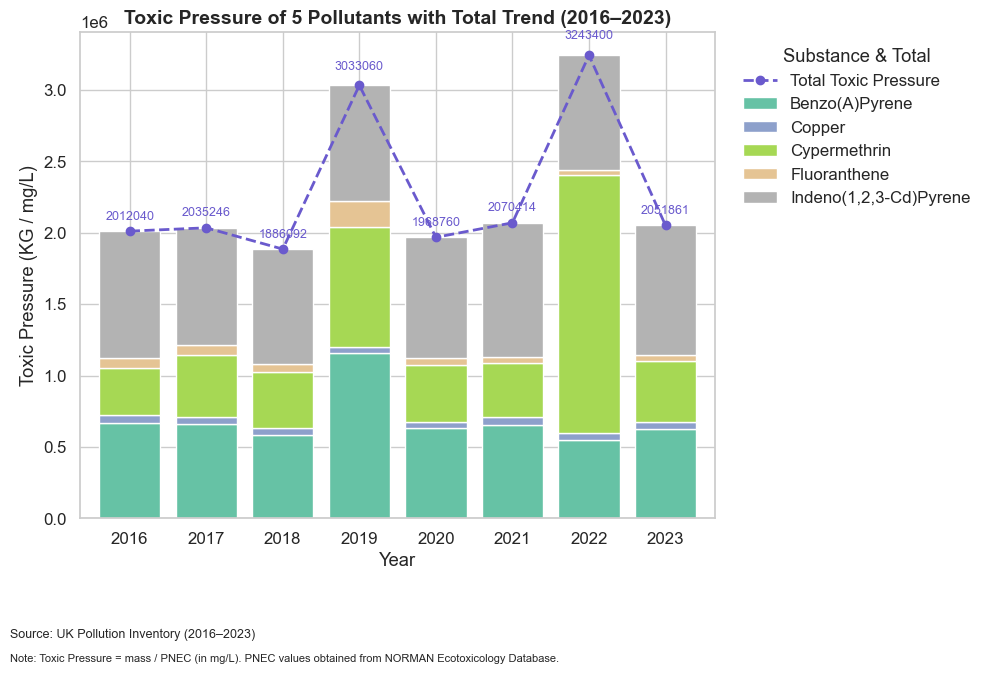

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid", font_scale=1.1)

# Read data
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate Toxic Pressure
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (mg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (mg/L)']

# Build a pivot table
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['Toxic Pressure'].sum().reset_index()
df_tp_pivot = df_tp.pivot(index='Year', columns='SUBSTANCE NAME', values='Toxic Pressure').fillna(0)
df_total = df_tp_pivot.sum(axis=1).reset_index(name='Total TP')

# ✅ Start drawing
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
df_tp_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', width=0.8)

# Add a general trend line chart (dashed line + soft colors)
ax.plot(df_total['Year'] - df_total['Year'].min(), df_total['Total TP'],
        color='slateblue', linestyle='--', marker='o', linewidth=2, label='Total Toxic Pressure')

# Add numerical annotation (consistent units)
for i, row in df_total.iterrows():
    value_label = f"{row['Total TP']:.0f}" if row['Total TP'] > 1000 else f"{row['Total TP']:.1f}"
    ax.text(i, row['Total TP'] * 1.03, value_label, color='slateblue', ha='center', va='bottom', fontsize=9)

# Title and axes
ax.set_title("Toxic Pressure of 5 Pollutants with Total Trend (2016–2023)", fontsize=14, weight='bold')
ax.set_ylabel("Toxic Pressure (KG / mg/L)")
ax.set_xlabel("Year")
ax.set_xticks(range(len(df_tp_pivot.index)))
ax.set_xticklabels(df_tp_pivot.index, rotation=0)

# Legend
ax.legend(title="Substance & Total", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Data source and annotation (emphasis on PNEC source)
plt.figtext(0.01, -0.08, "Source: UK Pollution Inventory (2016–2023)", fontsize=9, ha='left')
plt.figtext(0.01, -0.12,
            "Note: Toxic Pressure = mass / PNEC (in mg/L). PNEC values obtained from NORMAN Ecotoxicology Database.",
            fontsize=8, ha='left')

# Save high-definition image
plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\Slide5_ToxicPressure_Final.png", dpi=300)
plt.show()
